In [22]:
# Проверка тикера акции на существование
import requests

def get_all_moex_tickers():
    url = 'https://iss.moex.com/iss/engines/stock/markets/shares/securities.json'
    response = requests.get(url).json()
    
    tickers = [item[0] for item in response['securities']['data']]
    return tickers

all_tickers = get_all_moex_tickers()

print('OZON' in all_tickers)

True


In [347]:
# Вывод текущей цены акции без учета секции, в которой она торгуется
import requests

def get_moex_price(ticker):
    
    url = f'https://iss.moex.com/iss/engines/stock/markets/shares/securities/{ticker}.json'
    
    try:
        response = requests.get(url)
        response.raise_for_status() 
        data = response.json()
        
        columns = data['marketdata']['columns']
        values = data['marketdata']['data']

        if not values:
            print("Нет данных для указанного тикера.")
            return None

        last_price_index = columns.index('LAST') 
        last_price = values[0][last_price_index]  
        
        return last_price

    except requests.exceptions.RequestException as e:
        print('Ошибка запроса:', e)
        return None
    except (IndexError, KeyError) as e:
        print('Ошибка обработки данных:', e)
        return None

a = 'MTSS'
stock_price = get_moex_price(a)
print(f'Текущая цена акции {a}: {stock_price} руб.')

Текущая цена акции MTSS: 245.05 руб.


In [346]:
# Вывод цены акции с учетом секции, в которой она торгуется
import requests

def get_moex_price(ticker, board='TQBR'):
    
    url = f'https://iss.moex.com/iss/engines/stock/markets/shares/securities/{ticker}.json?board={board}'
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        
        columns = data['marketdata']['columns']
        values = data['marketdata']['data']
        
        if not values:
            print(f"Нет данных для тикера {ticker} в секции {board}.")
            return None
        
        last_price_index = columns.index('LAST') 
        last_price = values[0][last_price_index]  
        
        return last_price

    except requests.exceptions.RequestException as e:
        print('Ошибка запроса:', e)
        return None
    except (IndexError, KeyError) as e:
        print('Ошибка обработки данных:', e)
        return None

a = 'SBER'
ozon_price = get_moex_price(a, 'TQBR') 
print(f'Текущая цена акции {a}: {ozon_price} руб.')

Текущая цена акции SBER: 318.22 руб.


In [345]:
# Проверка того, в каких секциях торгуется акция

def get_moex_price(ticker):
    
    board = get_security_board(ticker) 
    if not board:
        print(f'Не удалось найти секцию для {ticker}')
        return None
    
    url = f'https://iss.moex.com/iss/engines/stock/markets/shares/securities/{ticker}.json?board={board}'
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        columns = data['marketdata']['columns']
        values = data['marketdata']['data']
        
        if not values:
            print(f'Нет данных для {ticker} в секции {board}.')
            return None
        
        last_price_index = columns.index('LAST')
        last_price = values[0][last_price_index]
        
        return last_price

    except requests.exceptions.RequestException as e:
        print('Ошибка запроса:', e)
        return None
    except (IndexError, KeyError) as e:
        print('Ошибка обработки данных:', e)
        return None

a = 'SBER'
ozon_price = get_moex_price(a)
print(f'Текущая цена акции {a}: {ozon_price} руб.')

Тикер SBER торгуется в секциях: [57, 6, 21, 42, 42, 120, 2, 95, 94, 94, 90, 125, 71, 72, 59, 8, 107, 1056, 1071, 1073, 1075, 1077, 1260, 201, 50, 92, 93, 152, 76, 78, 79, 1116, 148, 65, 91, 96, 153, 1080, 1082, 43, 44, 36, 36, 40, 40, 41, 41]
Текущая цена акции SBER: 318.22 руб.


In [353]:
# Получение курсов всех торгуемых на данный момент акций на мосбирже

tickers = ['ABIO', 'ABRD', 'AFKS', 'AFLT', 'ALRS', 'AMEZ', 'APRI', 'APTK', 'ARSA', 'ASSB', 'BISVP', 'BLNG', 'BSPB',
           'BSPBP', 'CARM', 'CBOM', 'CHGZ', 'CNTL', 'CNTLP', 'DIOD', 'DVEC', 'EELT', 'ELFV', 'ELMT', 'FEES', 'FESH',
           'FLOT', 'GAZA', 'GAZAP', 'GAZC', 'GAZP', 'GAZS', 'GAZT', 'GECO', 'GEMA', 'GMKN', 'GTRK', 'HIMCP', 'HYDR',
           'IRAO', 'IRKT', 'JNOS', 'JNOSP', 'KAZT', 'KAZTP', 'KBSB', 'KCHE', 'KCHEP', 'KGKC', 'KGKCP', 'KLSB', 'KLVZ',
           'KMAZ', 'KRKOP', 'KROT', 'KROTP', 'KRSB', 'KRSBP', 'KUZB', 'KZOS', 'KZOSP', 'LIFE', 'LPSB', 'LSNG', 'LSNGP',
           'LVHK', 'MAGE', 'MAGEP', 'MAGN', 'MFGS', 'MFGSP', 'MGKL', 'MISB', 'MISBP', 'MOEX', 'MRKC', 'MRKK', 'MRKP', 'MRKS',
           'MRKU', 'MRKV', 'MRKY', 'MRKZ', 'MRSB', 'MSNG', 'MSRS', 'MSTT', 'MTLRP', 'MTSS', 'NAUK', 'NFAZ', 'NKHP', 'NKNC',
           'NKNCP', 'NKSH', 'NLMK', 'NMTP', 'NSVZ', 'OGKB', 'OKEY', 'OZPH', 'PMSB', 'PMSBP', 'PRFN', 'RASP', 'RBCM', 'RDRB',
           'RENI', 'RGSS', 'ROLO', 'ROST', 'RTKM', 'RTKMP', 'RTSB', 'RTSBP', 'RU000A0ERGA7', 'RU000A0JPZL7', 'RU000A0JR282', 
           'RU000A0JR2A5', 'RU000A0JR2C1', 'RU000A108RS3', 'RUAL', 'RUSI', 'RZSB', 'SAGO', 'SAGOP', 'SARE', 'SAREP', 'SBER',
           'SBERP', 'SELG', 'SGZH', 'SLEN', 'SNGS', 'SNGSP', 'SOFL', 'STSB', 'STSBP', 'SVCB', 'TASB', 'TASBP', 'TGKA', 'TGKB',
           'TGKBP', 'TGKN', 'TORS', 'TORSP', 'TRMK', 'TTLK', 'TUZA', 'UGLD', 'UNAC', 'UPRO', 'USBN', 'UTAR', 'VEON-RX', 'VGSB',
           'VGSBP', 'VLHZ', 'VRSB', 'VRSBP', 'WTCM', 'WTCMP', 'YAKG', 'YKEN', 'YKENP', 'YRSB', 'YRSBP', 'ZAYM', 'ZVEZ', 'ABIO', 
           'AFKS', 'AFLT', 'ALRS', 'APRI', 'ASTR', 'BANE', 'BELU', 'BSPB', 'CBOM', 'CHMF', 'CNRU', 'DATA', 'DIAS', 'FEES', 'FESH',
           'FLOT', 'GAZP', 'GMKN', 'HYDR', 'IRAO', 'IVAT', 'KLVZ', 'KMAZ', 'LEAS', 'LKOH', 'LMBZ', 'MAGN', 'MBNK', 'MGNT', 'MOEX', 
           'MTLR', 'MTSS', 'MVID', 'NLMK', 'NVTK', 'OZON', 'OZPH', 'PHOR', 'PIKK', 'PLZL', 'POSI', 'PRMD', 'RAGR', 'RASP', 'RNFT', 
           'ROSN', 'RTKM', 'RUAL', 'SBER', 'SBERP', 'SFIN', 'SGZH', 'SIBN', 'SMLT', 'SNGS', 'SNGSP', 'SOFL', 'SPBE', 'SVCB', 'T', 
           'TATN', 'TATNP', 'TRNFP', 'VKCO', 'VSEH', 'VTBR', 'WUSH', 'X5', 'YDEX', 'ZAYM', 'ABIO', 'ABRD', 'AFKS', 'AFLT', 'AGRO', 
           'AKRN', 'ALRS', 'AMEZ', 'APRI', 'APTK', 'AQUA', 'ARSA', 'ASSB', 'ASTR', 'AVAN', 'BANE', 'BANEP', 'BELU', 'BISVP', 'BLNG',
           'BRZL', 'BSPB', 'BSPBP', 'CARM', 'CBOM', 'CHGZ', 'CHKZ', 'CHMF', 'CHMK', 'CIAN', 'CNRU', 'CNTL', 'CNTLP', 'DATA', 'DELI', 
           'DIAS', 'DIOD', 'DVEC', 'DZRD', 'DZRDP', 'EELT', 'ELFV', 'ELMT', 'ENPG', 'ETLN', 'EUTR', 'FEES', 'FESH', 'FIXP', 'FLOT', 
           'GAZA', 'GAZAP', 'GAZC', 'GAZP', 'GAZS', 'GAZT', 'GCHE', 'GECO', 'GEMA', 'GEMC', 'GMKN', 'GTRK', 'HEAD', 'HIMCP', 'HNFG',
           'HYDR', 'IGST', 'IGSTP', 'INGR', 'IRAO', 'IRKT', 'IVAT', 'JNOS', 'JNOSP', 'KAZT', 'KAZTP', 'KBSB', 'KCHE', 'KCHEP', 'KGKC',
           'KGKCP', 'KLSB', 'KLVZ', 'KMAZ', 'KMEZ', 'KOGK', 'KRKN', 'KRKNP', 'KRKOP', 'KROT', 'KROTP', 'KRSB', 'KRSBP', 'KUZB', 'KZOS', 
           'KZOSP', 'LEAS', 'LENT', 'LIFE', 'LKOH', 'LMBZ', 'LNZL', 'LNZLP', 'LPSB', 'LSNG', 'LSNGP', 'LSRG', 'LVHK', 'MAGE', 'MAGEP', 
           'MAGN', 'MBNK', 'MDMG', 'MFGS', 'MFGSP', 'MGKL', 'MGNT', 'MGNZ', 'MGTS', 'MGTSP', 'MISB', 'MISBP', 'MOEX', 'MRKC', 'MRKK', 
           'MRKP', 'MRKS', 'MRKU', 'MRKV', 'MRKY', 'MRKZ', 'MRSB', 'MSNG', 'MSRS', 'MSTT', 'MTLR', 'MTLRP', 'MTSS', 'MVID', 'NAUK', 
           'NFAZ', 'NKHP', 'NKNC', 'NKNCP', 'NKSH', 'NLMK', 'NMTP', 'NNSB', 'NNSBP', 'NSVZ', 'NVTK', 'OGKB', 'OKEY', 'OMZZP', 'OZON', 
           'OZPH', 'PAZA', 'PHOR', 'PIKK', 'PLZL', 'PMSB', 'PMSBP', 'POSI', 'PRFN', 'PRMB', 'PRMD', 'QIWI', 'RAGR', 'RASP', 'RBCM', 
           'RDRB', 'RENI', 'RGSS', 'RKKE', 'RNFT', 'ROLO', 'ROSN', 'ROST', 'RTGZ', 'RTKM', 'RTKMP', 'RTSB', 'RTSBP', 'RUAL', 'RUSI',
           'RZSB', 'SAGO', 'SAGOP', 'SARE', 'SAREP', 'SBER', 'SBERP', 'SELG', 'SFIN', 'SGZH', 'SIBN', 'SLEN', 'SMLT', 'SNGS', 'SNGSP',
           'SOFL', 'SPBE', 'STSB', 'STSBP', 'SVAV', 'SVCB', 'SVET', 'SVETP', 'T', 'TASB', 'TASBP', 'TATN', 'TATNP', 'TGKA', 'TGKB', 
           'TGKBP', 'TGKN', 'TNSE', 'TORS', 'TORSP', 'TRMK', 'TRNFP', 'TTLK', 'TUZA', 'UGLD', 'UKUZ', 'UNAC', 'UNKL', 'UPRO', 'URKZ',
           'USBN', 'UTAR', 'UWGN', 'VEON-RX', 'VGSB', 'VGSBP', 'VJGZ', 'VJGZP', 'VKCO', 'VLHZ', 'VRSB', 'VRSBP', 'VSEH', 
           'VSMO', 'VSYD', 'VSYDP', 'VTBR', 'WTCM', 'WTCMP', 'WUSH', 'X5', 'YAKG', 'YDEX',
           'YKEN', 'YKENP', 'YRSB', 'YRSBP', 'ZAYM', 'ZILL', 'ZVEZ']

for ticker in tickers:
    price = get_moex_price(ticker)
    print(f'{ticker}: {price} руб.')

ABIO: None руб.
ABRD: None руб.
AFKS: 18.044 руб.
AFLT: 73.73 руб.
ALRS: 59.93 руб.
AMEZ: None руб.
APRI: None руб.
APTK: 11.63 руб.
ARSA: None руб.
ASSB: 1.945 руб.
BISVP: None руб.
BLNG: None руб.
BSPB: 384 руб.
BSPBP: 85 руб.
CARM: None руб.
CBOM: 10.056 руб.
CHGZ: None руб.
CNTL: None руб.
CNTLP: None руб.
DIOD: None руб.
DVEC: None руб.
EELT: None руб.
ELFV: 0.54 руб.
ELMT: 0.1498 руб.
FEES: 0.0798 руб.
FESH: None руб.
FLOT: None руб.
GAZA: None руб.
GAZAP: None руб.
GAZC: None руб.
GAZP: 168.11 руб.
GAZS: None руб.
GAZT: None руб.
GECO: None руб.
GEMA: None руб.
GMKN: None руб.
GTRK: None руб.
HIMCP: None руб.
HYDR: 0.52 руб.
IRAO: 3.7395 руб.
IRKT: 36.26 руб.
JNOS: None руб.
JNOSP: 12.42 руб.
KAZT: None руб.
KAZTP: None руб.
KBSB: None руб.
KCHE: None руб.
KCHEP: None руб.
KGKC: None руб.
KGKCP: None руб.
KLSB: None руб.
KLVZ: None руб.
KMAZ: 122.8 руб.
KRKOP: None руб.
KROT: None руб.
KROTP: None руб.
KRSB: None руб.
KRSBP: None руб.
KUZB: None руб.
KZOS: None руб.
KZOSP: None 

In [50]:
# Вывод списка всех тикеров акций на мосбирже

def get_all_moex_tickers():

    url = 'https://iss.moex.com/iss/engines/stock/markets/shares/securities.json'
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        tickers = [item[0] for item in data['securities']['data']]
        return tickers

    except requests.exceptions.RequestException as e:
        print('Ошибка запроса:', e)
        return []
    except KeyError as e:
        print('Ошибка обработки данных:', e)
        return []

all_tickers = get_all_moex_tickers()
print('Всего тикеров:', len(all_tickers))
print(all_tickers) 

Всего тикеров: 679
['ABIO', 'ABRD', 'AFKS', 'AFLT', 'ALRS', 'AMEZ', 'APRI', 'APTK', 'ARSA', 'ASSB', 'BISVP', 'BLNG', 'BSPB', 'BSPBP', 'CARM', 'CBOM', 'CHGZ', 'CNTL', 'CNTLP', 'DIOD', 'DVEC', 'EELT', 'ELFV', 'ELMT', 'FEES', 'FESH', 'FLOT', 'GAZA', 'GAZAP', 'GAZC', 'GAZP', 'GAZS', 'GAZT', 'GECO', 'GEMA', 'GMKN', 'GTRK', 'HIMCP', 'HYDR', 'IRAO', 'IRKT', 'JNOS', 'JNOSP', 'KAZT', 'KAZTP', 'KBSB', 'KCHE', 'KCHEP', 'KGKC', 'KGKCP', 'KLSB', 'KLVZ', 'KMAZ', 'KRKOP', 'KROT', 'KROTP', 'KRSB', 'KRSBP', 'KUZB', 'KZOS', 'KZOSP', 'LIFE', 'LPSB', 'LSNG', 'LSNGP', 'LVHK', 'MAGE', 'MAGEP', 'MAGN', 'MFGS', 'MFGSP', 'MGKL', 'MISB', 'MISBP', 'MOEX', 'MRKC', 'MRKK', 'MRKP', 'MRKS', 'MRKU', 'MRKV', 'MRKY', 'MRKZ', 'MRSB', 'MSNG', 'MSRS', 'MSTT', 'MTLRP', 'MTSS', 'NAUK', 'NFAZ', 'NKHP', 'NKNC', 'NKNCP', 'NKSH', 'NLMK', 'NMTP', 'NSVZ', 'OGKB', 'OKEY', 'OZPH', 'PMSB', 'PMSBP', 'PRFN', 'RASP', 'RBCM', 'RDRB', 'RENI', 'RGSS', 'ROLO', 'ROST', 'RTKM', 'RTKMP', 'RTSB', 'RTSBP', 'RU000A0ERGA7', 'RU000A0JPZL7', 'RU000

In [351]:
# Текущая цена акции с мосбиржи и количество проданных за сегодня лотов
import requests

def get_moex_data(ticker):

    url = f'https://iss.moex.com/iss/engines/stock/markets/shares/securities/{ticker}.json'
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        
        columns = data['marketdata']['columns']
        values = data['marketdata']['data']
        
        if not values:
            print(f"Нет данных для {ticker}")
            return None, None

        last_price_index = columns.index('LAST') if 'LAST' in columns else None
        volume_index = columns.index('VOLTODAY') if 'VOLTODAY' in columns else None

        last_price = values[0][last_price_index] if last_price_index is not None else None
        volume = values[0][volume_index] if volume_index is not None else None
        
        return last_price, volume

    except requests.exceptions.RequestException as e:
        print('Ошибка запроса:', e)
        return None, None
    except (IndexError, KeyError) as e:
        print('Ошибка обработки данных:', e)
        return None, None

a = 'HEAD'
stock_price, stock_volume = get_moex_data(a)
print(f'Текущая цена акции {a}: {stock_price} руб.')
print(f'Объем торгов акцией {a} сегодня: {stock_volume} лотов')

Текущая цена акции HEAD: 3392 руб.
Объем торгов акцией HEAD сегодня: 399276 лотов


Запрашиваю данные с 2015-03-01 по 2015-03-31
Запрашиваю данные с 2015-04-01 по 2015-04-30
Запрашиваю данные с 2015-05-01 по 2015-05-31
Запрашиваю данные с 2015-06-01 по 2015-06-30
Запрашиваю данные с 2015-07-01 по 2015-07-31
Запрашиваю данные с 2015-08-01 по 2015-08-31
Запрашиваю данные с 2015-09-01 по 2015-09-30
Запрашиваю данные с 2015-10-01 по 2015-10-31
Запрашиваю данные с 2015-11-01 по 2015-11-30
Запрашиваю данные с 2015-12-01 по 2015-12-31
Запрашиваю данные с 2016-01-01 по 2016-01-31
Запрашиваю данные с 2016-02-01 по 2016-02-29
Запрашиваю данные с 2016-03-01 по 2016-03-31
Запрашиваю данные с 2016-04-01 по 2016-04-30
Запрашиваю данные с 2016-05-01 по 2016-05-31
Запрашиваю данные с 2016-06-01 по 2016-06-30
Запрашиваю данные с 2016-07-01 по 2016-07-31
Запрашиваю данные с 2016-08-01 по 2016-08-31
Запрашиваю данные с 2016-09-01 по 2016-09-30
Запрашиваю данные с 2016-10-01 по 2016-10-31
Запрашиваю данные с 2016-11-01 по 2016-11-30
Запрашиваю данные с 2016-12-01 по 2016-12-31
Запрашиваю

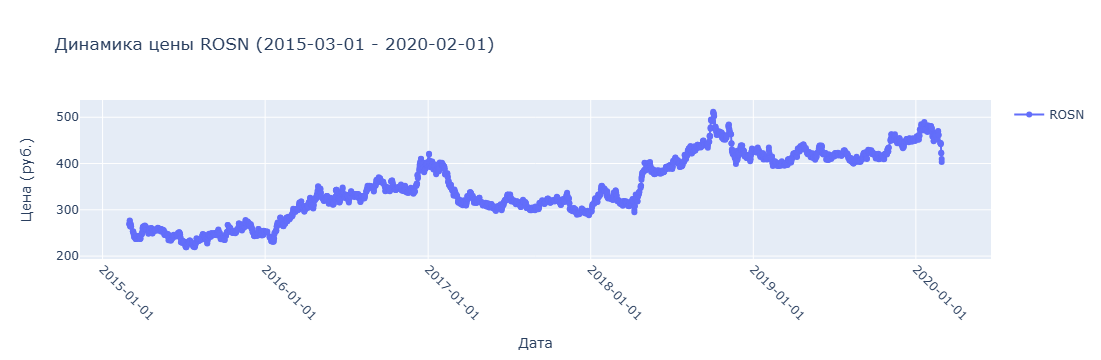

In [135]:
# Интерактивный график курса любой торгуемой на мосбирже акции за заданный период
import requests
import plotly.graph_objects as go
import datetime

def get_historical_prices(ticker, date_from, date_to):
    
    url = f'https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/{ticker}.json?from={date_from}&till={date_to}'
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        columns = data['history']['columns']
        values = data['history']['data']

        if not values:
            print(f'Нет данных для {ticker} за период {date_from} - {date_to}')
            return []

        close_index = columns.index('CLOSE')
        date_index = columns.index('TRADEDATE')

        prices = [(entry[date_index], entry[close_index]) for entry in values if entry[close_index] is not None]
        return prices

    except requests.exceptions.RequestException as e:
        print('Ошибка запроса:', e)
        return []
    except (IndexError, KeyError) as e:
        print('Ошибка обработки данных:', e)
        return []

def get_data_for_period(ticker, date_from, date_to):
    
    start_date = datetime.datetime.strptime(date_from, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(date_to, '%Y-%m-%d')

    all_prices = []

    while start_date <= end_date:
        
        next_month = start_date.replace(day=28) + datetime.timedelta(days=4)
        next_month = next_month.replace(day=1)
        month_end = next_month - datetime.timedelta(days=1)

        month_end_str = month_end.strftime('%Y-%m-%d')
        start_date_str = start_date.strftime('%Y-%m-%d')

        print(f'Запрашиваю данные с {start_date_str} по {month_end_str}')

        prices = get_historical_prices(ticker, start_date_str, month_end_str)
        all_prices.extend(prices)

        start_date = month_end + datetime.timedelta(days=1)

    return all_prices

def plot_interactive_stock_price(ticker, date_from, date_to):

    prices = get_data_for_period(ticker, date_from, date_to)

    if not prices:
        print(f'Нет данных для {ticker}')
        return

    dates = [datetime.datetime.strptime(p[0], '%Y-%m-%d') for p in prices]
    values = [p[1] for p in prices]

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=dates,
        y=values,
        mode='lines+markers',
        name=f"{ticker}",
        hovertemplate=
            '<b>Дата: %{x}</b><br>' +
            'Цена: %{y} руб.<br>' +
            '<extra></extra>' 
    ))

    fig.update_layout(
        title=f'Динамика цены {ticker} ({date_from} - {date_to})',
        xaxis_title='Дата',
        yaxis_title='Цена (руб.)',
        template='plotly', 
        xaxis=dict(
            tickformat='%Y-%m-%d',
            tickangle=45
        ),
        showlegend=True
    )

    fig.show()

plot_interactive_stock_price('ROSN', '2015-03-01', '2020-02-01')

In [ ]:
# Сохраняет в единый локальный файл ежедневные цены закрытия нескольких акций
import requests
import pandas as pd
import time
import datetime

def get_historical_prices(ticker, date_from, date_to):
    
    url = f'https://iss.moex.com/iss/history/engines/stock/markets/shares/securities/{ticker}.json?from={date_from}&till={date_to}'
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()

        columns = data['history']['columns']
        values = data['history']['data']

        if not values:
            print(f'Нет данных для {ticker} за период {date_from} - {date_to}')
            return []

        close_index = columns.index('CLOSE')
        date_index = columns.index('TRADEDATE')

        return [(entry[date_index], entry[close_index]) for entry in values]

    except requests.exceptions.RequestException as e:
        print('Ошибка запроса:', e)
        return []
    except (IndexError, KeyError) as e:
        print('Ошибка обработки данных:', e)
        return []

def save_data_to_csv(tickers, date_from, date_to, filename='historical_prices.csv'):

    all_data = []

    headers = ['Ticker', 'Date', 'Close Price']

    start_date = datetime.datetime.strptime(date_from, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(date_to, '%Y-%m-%d')

    while start_date <= end_date:
        
        next_month = start_date.replace(day=28) + datetime.timedelta(days=4)
        next_month = next_month.replace(day=1)
        month_end = next_month - datetime.timedelta(days=1)

        month_end_str = month_end.strftime('%Y-%m-%d')
        start_date_str = start_date.strftime('%Y-%m-%d')

        print(f'Запрашиваю данные для {start_date_str} по {month_end_str}')

        for ticker in tickers:
            prices = get_historical_prices(ticker, start_date_str, month_end_str)

            for date, price in prices:
                all_data.append([ticker, date, price])
            time.sleep(0.21) 

        start_date = month_end + datetime.timedelta(days=1)

    df = pd.DataFrame(all_data, columns=headers)
    df.to_csv(filename, index=False)
    print(f'Данные успешно сохранены в {filename}')

tickers = ['SBER', 'ALRS', 'HEAD', 'MTSS', 'OZON', 'TATN']  
save_data_to_csv(tickers, '2015-01-01', '2025-01-01')

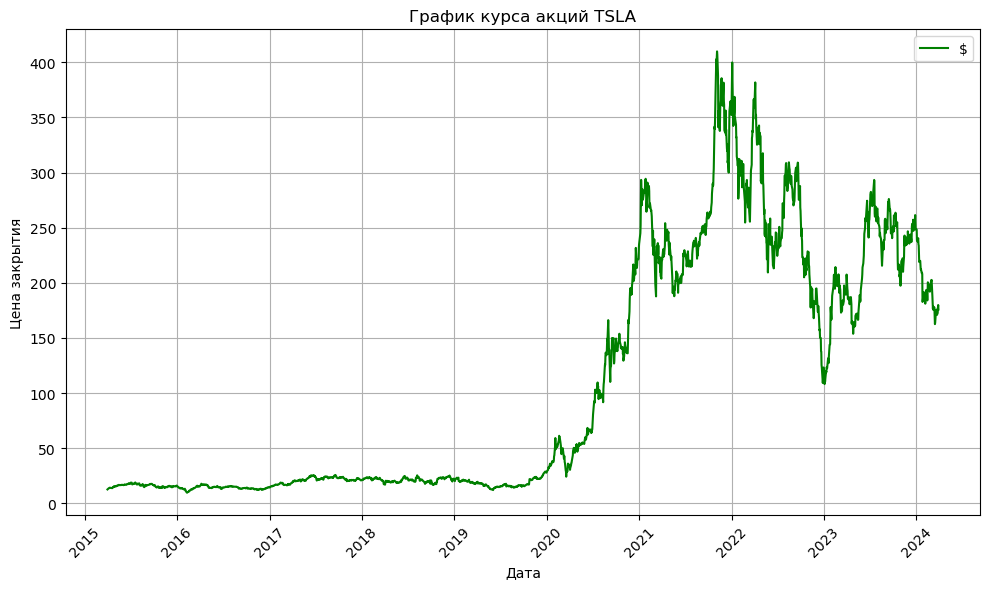

In [343]:
# Вывод графика курса акции (или фондового индекса) за заданный период
import yfinance as yf
import matplotlib.pyplot as plt

a = 'TSLA'
start_date = '2015-04-01'
end_date = '2024-04-01'

def get_stock_data(x, start_date, end_date):

    ticker = x
    df = yf.download(ticker, start=start_date, end=end_date, progress=False)
    
    if df.empty:
        print(f'Нет данных для {ticker} за период {start_date} - {end_date}')
        return pd.DataFrame()
    
    return df

stock_df = get_stock_data(a, start_date, end_date)

if not stock_df.empty:

    plt.figure(figsize=(10, 6))
    plt.plot(stock_df.index, stock_df['Close'], label='$', color='green')
    plt.title(f'График курса акций {a}')
    plt.xlabel('Дата')
    plt.ylabel('Цена закрытия')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('Не удалось загрузить данные')

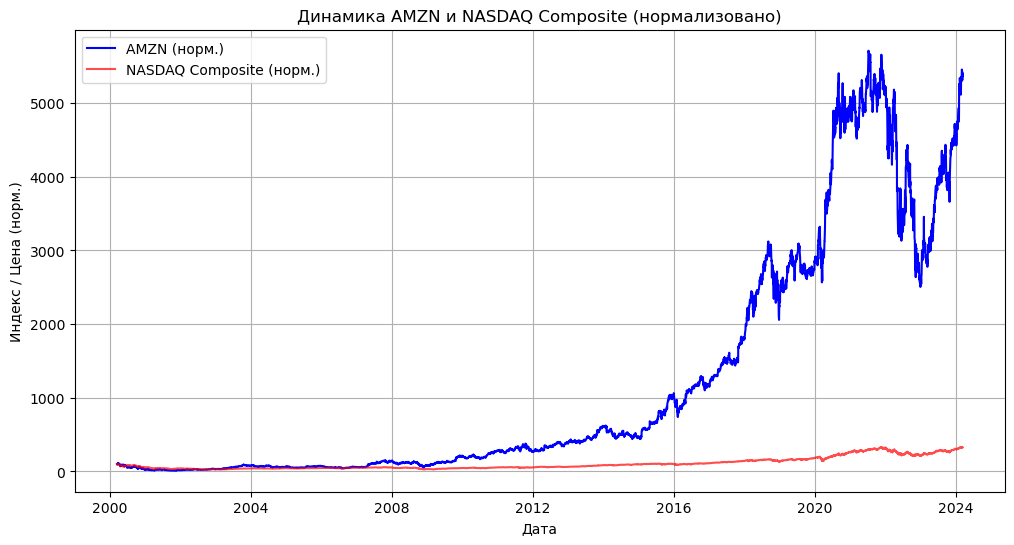

Итоговая цена вложений составила 1638.15% от вложений в индекс
Среднегодовая доходность вложений в NASDAQ составила 5.07%
Среднегодовая доходность вложений в AMZN составила 18.05%


In [349]:
# Ячейка для вывода графиков индекса NASDAQ и какой-то акции
# В конце - то, на сколько процентов рост акции обогнал рынок
import yfinance as yf
import matplotlib.pyplot as plt

a = 'AMZN'
start_date = '2000-03-11'
end_date = '2024-03-11'

stock_df = yf.download(a, start=start_date, end=end_date, progress=False)
nasdaq_df = yf.download('^IXIC', start=start_date, end=end_date, progress=False)

if stock_df.empty or nasdaq_df.empty:
    print('Ошибка: не удалось загрузить данные')
else:
    # Нормализуем данные, чтобы отобразить их на одном графике
    stock_norm = stock_df['Close'] / stock_df['Close'].iloc[0] * 100
    nasdaq_norm = nasdaq_df['Close'] / nasdaq_df['Close'].iloc[0] * 100

    plt.figure(figsize=(12, 6))
    plt.plot(stock_df.index, stock_norm, label=f'{a} (норм.)', color='blue')
    plt.plot(nasdaq_df.index, nasdaq_norm, label='NASDAQ Composite (норм.)', color='red', alpha=0.7)

    plt.xlabel('Дата')
    plt.ylabel('Индекс / Цена (норм.)')
    plt.title(f'Динамика {a} и NASDAQ Composite (нормализовано)')
    plt.legend()
    plt.grid()
    plt.show()
    w = round(float(stock_norm.iloc[-1]) * 100/float(nasdaq_norm.iloc[-1]), 2)
    r = 1 / (-int(start_date[:4]) + int(end_date[:4]))
    print(f'Итоговая цена вложений составила {w}% от вложений в индекс')
    print(f'Среднегодовая доходность вложений в NASDAQ составила {round((100 * (float(nasdaq_norm.iloc[-1])/float(nasdaq_norm.iloc[0])) ** r) - 100, 2)}%')
    print(f'Среднегодовая доходность вложений в {a} составила {round((100 * (float(stock_norm.iloc[-1])/float(stock_norm.iloc[0])) ** r) - 100, 2)}%')

In [297]:
# Ячейка для рассчета беты акции (степень колебаний курса акции относительно колебаний рынка в целом)
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import linregress

start_date = '2023-03-01'
end_date = '2025-03-01'

action_df = yf.download('TSLA', start=start_date, end=end_date, progress=False)
nasdaq_df = yf.download('^IXIC', start=start_date, end=end_date, progress=False)

if action_df.empty or nasdaq_df.empty:
    print('Ошибка: не удалось загрузить данные')
else:
    # Рассчитываем дневные доходности (логарифмические изменения)
    action_df['Returns'] = action_df['Close'].pct_change()
    nasdaq_df['Returns'] = nasdaq_df['Close'].pct_change()

    # Удаляем строки с NaN
    merged_df = pd.merge(action_df['Returns'], nasdaq_df['Returns'], left_index=True, right_index=True, suffixes=('_TSLA', '_NASDAQ')).dropna()

    # Расчет беты с помощью линейной регрессии
    slope, _, _, _, _ = linregress(merged_df['Returns_NASDAQ'], merged_df['Returns_TSLA'])

    print(f'Коэффициент бета относительно NASDAQ за указанный временной промежуток: {slope:.4f}')

Коэффициент бета относительно NASDAQ за указанный временной промежуток: 1.8316


In [291]:
# Рассчет стандартного отклонения ежедневной доходности акции
import yfinance as yf
import numpy as np

a = 'AAPL'
start_date = '2015-03-01'
end_date = '2025-03-01'

tesla_df = yf.download(a, start=start_date, end=end_date, progress=False)

if tesla_df.empty:
    print('Ошибка: не удалось загрузить данные')
else:
    # Рассчитываем дневные доходности
    tesla_df['Returns'] = tesla_df['Close'].pct_change()
    std_dev = tesla_df['Returns'].std()

    print(f'Стандартное отклонение дневной доходности компании с тикером {a}: {std_dev:.4%}')

Стандартное отклонение дневной доходности компании с тикером AAPL: 1.7907%


In [335]:
# Получение финансовой отчетности интересующей компании
import yfinance as yf

tesla = yf.Ticker('Z')
print(tesla.financials)

                                                      2024-12-31  \
Tax Effect Of Unusual Items                           -1680000.0   
Tax Rate For Calcs                                          0.21   
Normalized EBITDA                                    187000000.0   
Total Unusual Items                                   -8000000.0   
Total Unusual Items Excluding Goodwill                -8000000.0   
Net Income From Continuing Operation Net Minori...  -112000000.0   
Reconciled Depreciation                              250000000.0   
Reconciled Cost Of Revenue                           527000000.0   
EBITDA                                               179000000.0   
EBIT                                                 -71000000.0   
Net Interest Income                                  -36000000.0   
Interest Expense                                      36000000.0   
Normalized Income                                   -105680000.0   
Net Income From Continuing And Discontinued Ope.

In [355]:
# Рассчет коэффициента Шарпа за год
import yfinance as yf
import numpy as np

a = 'NVDA'
tesla_df = yf.download(a, start='2024-03-01', end='2025-03-01', progress=False)

tesla_df['Returns'] = tesla_df['Close'].pct_change()

# Безрисковая дневная доходность (252 торговых дня в году)
risk_free_rate = 0.07 / 252 

# Средняя доходность акции
mean_return = tesla_df['Returns'].mean()

std_dev = tesla_df['Returns'].std()

sharpe_ratio = (mean_return - risk_free_rate) / std_dev * np.sqrt(252) 

print(f'Коэффициент Шарпа для {a}: {sharpe_ratio:.4f}')

Коэффициент Шарпа для NVDA: 0.9160
